# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:
# imported packages for problem 6
import scipy
from scipy.ndimage import filters

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [5]:
x = [1,2,3,4,5]
x[:3]

[1, 2, 3]

### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

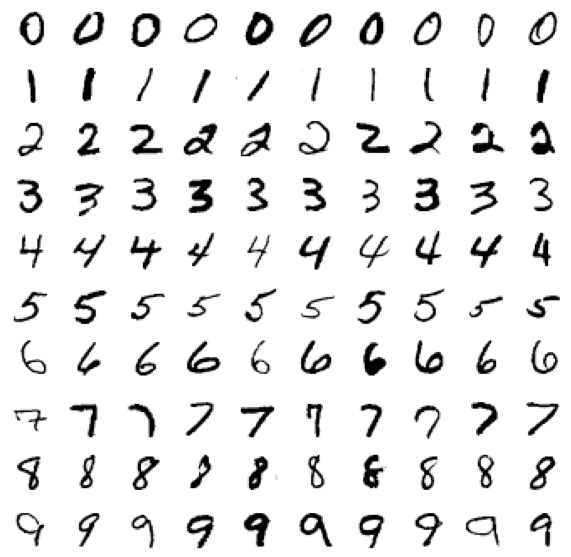

In [6]:
def P1(num_examples=10):

### STUDENT START ###
    
    digits = ['0','1','2','3','4','5','6','7','8','9']
    dimensions = int(28)
    figure, axs = plt.subplots(num_examples, num_examples, figsize=(10,10))
    for n,m in enumerate(digits):
        for o in range(10):
            axs[n,o].imshow(X[Y==m][o].reshape((dimensions,dimensions)), cmap = 'Greys')
            axs[n,o].axis('off')
            
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [7]:
mini_train_data.shape

(1000, 784)

In [8]:
dev_data.shape

(1000, 784)

In [113]:
def P2(k_values):

### STUDENT START ###
    for k in k_values: 
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(mini_train_data, mini_train_labels)
        
        if k == 1: 
            dev_pred = knn.predict(dev_data)
            print(classification_report(dev_labels, dev_pred))
        error = (dev_labels != dev_pred).sum() / len(dev_pred)
        accuracy = 1-error
        #print(classification_report(dev_labels, dev_pred))
        print('the performance of k =', k, 'nearest neighbors had a prediction error =', error, 'and a prediction accuracy =', accuracy)
        
        
### STUDENT END ###
# 1 nearest neighbor classification report
#knn_k1 = KneighborsClassifier(n_neighbors = 1)
#knn_k1.fit(mini_train_data, mini_train_labels)
#dev_pred_k1 = knn_k1.predict(dev_data)
#print(classification_report(dev_labels, dev_pred_k1)

k_values = [1, 3, 5, 7, 9]
P2(k_values)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

the performance of k = 1 nearest neighbors had a prediction error = 0.116 and a prediction accuracy = 0.884
the performance of k = 3 nearest neighbors had a prediction error = 0.116 and a prediction accuracy = 0.884
the performance of k = 5 

ANSWER: the most difficult digit to classify using the 1-nearest neighbor classifier is the digit "9".

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [114]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
range(len(train_sizes))

range(0, 9)

In [115]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for i in train_sizes:
        train_data_up_to_i = train_data[:i]
        train_labels_up_to_i = train_labels[:i]
        model = KNeighborsClassifier(n_neighbors = 1)
        model.fit(train_data_up_to_i, train_labels_up_to_i)
        
        start = time.time()
        scores = model.score(dev_data, dev_labels)
        end = time.time()
        times = round((end - start), 2)

        print('For a train size of', i, 'the accuracy is', scores, 'and the time elapsed is', times, 'seconds')
        accuracies.append(scores)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For a train size of 100 the accuracy is 0.702 and the time elapsed is 0.15 seconds
For a train size of 200 the accuracy is 0.791 and the time elapsed is 0.26 seconds
For a train size of 400 the accuracy is 0.811 and the time elapsed is 0.49 seconds
For a train size of 800 the accuracy is 0.866 and the time elapsed is 0.99 seconds
For a train size of 1600 the accuracy is 0.905 and the time elapsed is 2.06 seconds
For a train size of 3200 the accuracy is 0.927 and the time elapsed is 4.6 seconds
For a train size of 6400 the accuracy is 0.939 and the time elapsed is 8.34 seconds
For a train size of 12800 the accuracy is 0.952 and the time elapsed is 16.61 seconds
For a train size of 25600 the accuracy is 0.963 and the time elapsed is 33.8 seconds


In [116]:
accuracies

[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

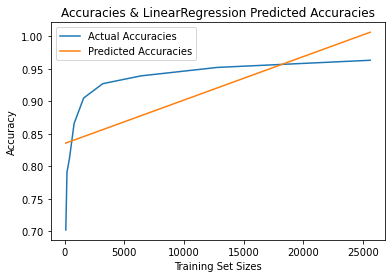

The Rsquared value for the original model is -0.20756193744773732
Predicted accuracy for training size 60000 = 1.2361731707874237
Predicted accuracy for training size 120000 = 1.637428053637104
Predicted accuracy for training size 1000000 = 7.522499668765751


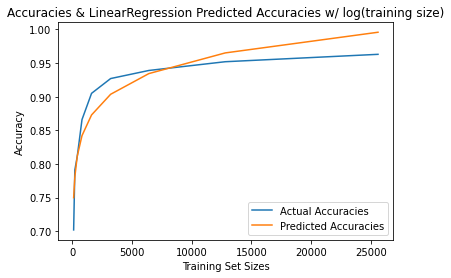

The Rsquared value for the model with log(training size) -11.901004364685065
Predicted accuracy for training size 60000 = 1.0335879166434623
Predicted accuracy for training size 120000 = 1.0643212499767958
Predicted accuracy for training size 1000000 = 1.1583312493537086


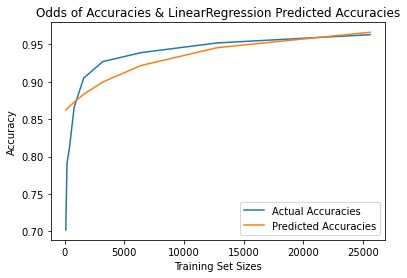

The Rsquared value for the model using the odds of the accuracies -0.4297839504360361
Predicted accuracy for training size 60000 = 0.9832927097569462
Predicted accuracy for training size 120000 = 0.9911143865080189
Predicted accuracy for training size 1000000 = 0.9988704258725941


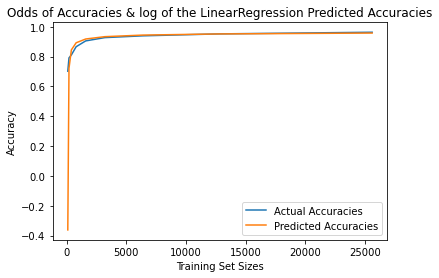

The Rsquared value for the model using the odds of the accuracies & log of the training sizes: -12.682926478408362
Predicted accuracy for training size 60000 = 0.9630701660900399
Predicted accuracy for training size 120000 = 0.9665919573218424
Predicted accuracy for training size 1000000 = 0.9741365674202281


In [125]:
def P4(training_set_sizes):

### STUDENT START ###

    # reshape arrays
    training_set_sizes = [60000, 120000, 1000000]
    training_set_size = np.reshape(training_set_sizes, (-1,1))
    train_size = np.reshape(train_sizes, (-1,1))
    accuracy = np.reshape(accuracies, (-1,1))
    
# model 1
    model1 = LinearRegression().fit(train_size,accuracy)
    # run the model on the training sizes from P3
    pred1 = model1.predict(train_size)
    # run the model on the new training sizes
    new_pred1 = model1.predict(training_set_size)
    # plot LinearRegression model with no transformations
    plt.plot(train_sizes, accuracies, label = 'Actual Accuracies')
    plt.plot(train_sizes, pred1, label = 'Predicted Accuracies')
    plt.legend()
    plt.xlabel('Training Set Sizes')
    plt.ylabel('Accuracy')
    plt.title('Accuracies & LinearRegression Predicted Accuracies')
    plt.show()
    #show the R-squared value and the predicted accuracy
    print('The Rsquared value for the original model is', model1.score(pred1, accuracies))
    for n in range(len(training_set_sizes)):
        print('Predicted accuracy for training size', training_set_sizes[n], '=', float(new_pred1[n]))
        
    
#model 2 - 1st transformation - take the log of the train sizes
    train_size_logs = np.log(train_size)
    test_train_size_logs = np.log(training_set_size)
    model2 = LinearRegression().fit(train_size_logs, accuracy)
    # run the model on the log of the training sizes from P3
    pred2 = model2.predict(train_size_logs)
    # run the model on the log of the new training sizes
    new_pred2 = model2.predict(test_train_size_logs)
    #plot transformation of the log of the training sizes
    plt.plot(train_sizes, accuracies, label = 'Actual Accuracies')
    plt.plot(train_sizes, pred2, label = 'Predicted Accuracies')
    plt.legend()
    plt.xlabel('Training Set Sizes')
    plt.ylabel('Accuracy')
    plt.title('Accuracies & LinearRegression Predicted Accuracies w/ log(training size)')
    plt.show()
    #show the R-squared value and the predicted accuracy
    print('The Rsquared value for the model with log(training size)', model2.score(pred2, accuracies))
    for n in range(len(training_set_sizes)):
        print('Predicted accuracy for training size', training_set_sizes[n], '=', float(new_pred2[n]))
        
#model 3- 2nd transformation - take the odds of accuracies
    accuracies_odds = accuracy / (1-accuracy)
    model3 = LinearRegression().fit(train_size, accuracies_odds)
    # run the model on the training sizes from P3
    pred3 = model3.predict(train_size)
    #run the model on the new training sizes 
    new_pred3 = model3.predict(training_set_size)
    # back to probability
    pred3 = pred3 / (1+pred3)
    new_pred3 = new_pred3 / (1+new_pred3)
    #plot 
    plt.plot(train_sizes, accuracies, label = 'Actual Accuracies')
    plt.plot(train_sizes, pred3, label = 'Predicted Accuracies')
    plt.legend()
    plt.xlabel('Training Set Sizes')
    plt.ylabel('Accuracy')
    plt.title('Odds of Accuracies & LinearRegression Predicted Accuracies')
    plt.show()
    #show the R-squared value and the predicted accuracy
    print('The Rsquared value for the model using the odds of the accuracies', model3.score(pred3, accuracies_odds))
    for n in range(len(training_set_sizes)):
        print('Predicted accuracy for training size', training_set_sizes[n], '=', float(new_pred3[n]))
        
#model 4- log of the training size and odds of the accuracies
    model4 = LinearRegression().fit(train_size_logs, accuracies_odds)
    # run the model on the log of the training sizes from P3
    pred4 = model4.predict(train_size_logs)
    new_pred4 = model4.predict(test_train_size_logs)
    #back to probability
    pred4 = pred4 / (1+pred4)
    new_pred4 = new_pred4 / (1+new_pred4)
    # plot
    plt.plot(train_sizes, accuracies, label = 'Actual Accuracies')
    plt.plot(train_sizes, pred4, label = 'Predicted Accuracies')
    plt.legend()
    plt.xlabel('Training Set Sizes')
    plt.ylabel('Accuracy')
    plt.title('Odds of Accuracies & log of the LinearRegression Predicted Accuracies')
    plt.show()
    #show the R-squared value and the predicted accuracy
    print('The Rsquared value for the model using the odds of the accuracies & log of the training sizes:', model4.score(pred4, accuracies_odds))
    for n in range(len(training_set_sizes)):
        print('Predicted accuracy for training size', training_set_sizes[n], '=', float(new_pred4[n]))
    

### STUDENT END ###

P4(training_set_sizes)

ANSWER: The linear regression model is naive so probabilities are not between 0 and 1 when data haven't been manipulated. Normalizing data yields a probability that upholds the axioms of probability.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

(None,
 array([[101,   0,   1,   0,   0,   0,   1,   1,   2,   0],
        [  0, 116,   1,   0,   0,   0,   0,   0,   1,   0],
        [  1,   4,  84,   2,   2,   0,   2,   4,   6,   1],
        [  0,   2,   0,  84,   0,   6,   0,   2,   3,   0],
        [  0,   0,   1,   0,  78,   0,   0,   2,   0,  11],
        [  2,   0,   0,   1,   1,  77,   5,   0,   2,   0],
        [  1,   2,   1,   0,   1,   2,  94,   0,   1,   0],
        [  0,   1,   1,   0,   0,   0,   0,  96,   0,   4],
        [  1,   5,   4,   3,   1,   3,   0,   1,  72,   4],
        [  0,   1,   0,   0,   3,   2,   0,   7,   0,  82]]))

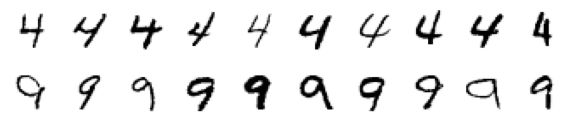

In [126]:
def P5():

### STUDENT START ###
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    predict = model.predict(dev_data)
    return confusion_matrix(dev_labels, predict)
    
def show_digits(num_examples = 10):
    
    digits = ['4','9']
    dimensions = int(28)
    figure, axs = plt.subplots(2, num_examples, figsize=(10,2))

    for n,m in enumerate(digits):
        for o in range(10):
            axs[n,o].imshow(X[Y==m][o].reshape((dimensions,dimensions)), cmap = 'Greys')
            axs[n,o].axis('off')
    
### STUDENT END ###
show_digits(), P5()

ANSWER: Digits 9 and 4 are confused most often.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [127]:
def P6(data1, labels1, data2, labels2):
    
### STUDENT START ###
    def blurring(data, the_filter = scipy.ndimage.filters.gaussian_filter):
        data_pic = np.array(data).reshape((28, 28))
        filtered = the_filter(data_pic, sigma = 1).flatten()
        return filtered
    
    data1_blurred, data2_blurred = np.apply_along_axis(blurring, 1, data1), np.apply_along_axis(blurring, 1, data2)
    #no filter data
    model = KNeighborsClassifier(n_neighbors = 8).fit(data1, labels1)
    score = model.score(data2, labels2)
    print('the accuracy of no blurring on either dataset:', score)
    #filter both
    model1 = KNeighborsClassifier(n_neighbors = 8).fit(data1_blurred, labels1)
    score1 = model1.score(data2_blurred, labels2)
    print('the accuracy of blurring on both datasets:', score1)
    #filter train
    model2 = KNeighborsClassifier(n_neighbors = 8).fit(data1_blurred, labels1)
    score2 = model2.score(data2, labels2)
    print('the accuracy of blurring on only the train dataset:', score2)
    #filter test
    model3 = KNeighborsClassifier(n_neighbors = 8).fit(data1, labels1)
    score3 = model3.score(data2_blurred, labels2)
    print('the accuracy of blurring on only the test dataset:', score3)
### STUDENT END ###

P6(mini_train_data, mini_train_labels, dev_data, dev_labels)

the accuracy of no blurring on either dataset: 0.876
the accuracy of blurring on both datasets: 0.904
the accuracy of blurring on only the train dataset: 0.9
the accuracy of blurring on only the test dataset: 0.852


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [135]:
def P7(data1, labels1, data2, labels2):

### STUDENT START ###
    def map_pixels(data):
        new_data = np.zeros_like(data, dtype = 'int')
        for count, num in enumerate(data):
            for x, y in enumerate(num):
                if y<=0.25:
                    new_data[count][x] = 0
                elif y<0.75 or y>0.25:
                    new_data[count][x] = 1
                else:
                    new_data[count][x] = 2
        return new_data
    
    #Bernoulli NB
    bnb = BernoulliNB(binarize = 0.5)
    bnb.fit(data1, labels1)
    bnb_score = bnb.score(data2, labels2)
    
    #multinomial
    data1_mapped, data2_mapped = map_pixels(data1), map_pixels(data2)
    mnb = MultinomialNB()
    mnb.fit(data1_mapped, labels1)
    mnb_score = mnb.score(data2_mapped, labels2)
    
    print('BernoulliNB model accuracy:', bnb_score)
    print('MultinomialNB model accuracy:', mnb_score)

    
### STUDENT END ###

P7(mini_train_data, mini_train_labels, dev_data, dev_labels)

BernoulliNB model accuracy: 0.819
MultinomialNB model accuracy: 0.808


ANSWER: Using the Multinomial Naive Bayes model, we see that the accuracy is lower than that of the Bernoulli Naive Bayes model. By trying different threshold values for mapping the data used in the Multinomial model to 0,1,2 we see a very slight increase/decrease in the accuracy. Because the Multinomial model maps values to 0,1, and 2 instead of the binary values used in the Bernoulli model (0 and 1), the accuracy for the Multinomial model could be lower because there are more options to classify data values.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [31]:
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
[a for a in alphas.values()][0]

[1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

In [34]:
def P8(alphas):

### STUDENT START ###
    model = BernoulliNB()
    model_grid = GridSearchCV(model, alphas, cv = 5, scoring = 'accuracy')
    model_grid.fit(mini_train_data, mini_train_labels)
    alpha_values = [a for a in alphas.values()][0]
    accuracies = model_grid.cv_results_['mean_test_score']
    print('for alpha values:,', alpha_values)
    print('the corresponding accuracies are:', accuracies)
    return model_grid

    

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

for alpha values:, [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
the corresponding accuracies are: [0.814 0.819 0.825 0.822 0.818 0.813 0.809 0.805 0.783]

Best alpha =  {'alpha': 0.001}


ANSWER: The best value for alpha is 0.001, and this value of alpha will maximize accuracy. When alpha is less than 0.001 (ie: 1e-10 and 0.0001) alpha's accuracy is a bit lower than the best alpha's accuracy, but because these Laplace smoothing parameters are small they don't disrupt the accuracy value much. However, when alpha increases past the best alpha value, accuracy begins to decrease because larger values of alpha create more variability and thus lower accuracy.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [144]:
def P9(data1, labels1, data2, labels2):

### STUDENT END ###
    # unfixed model
    model_unfixed = GaussianNB()
    model_unfixed.fit(data1, labels1)
    model_unfixed_score = model_unfixed.score(data2, labels2)
    print('the accuracy of the unfixed gaussian model:', model_unfixed_score)
#    print(model_unfixed.theta_)
 #   print(model_unfixed.sigma_)
    
    # fixed model
    model_fixed = GaussianNB(var_smoothing = 0.1)
    model_fixed.fit(data1, labels1)
    model_fixed_score = model_fixed.score(data2, labels2)
    print('the accuracy of the fixed gaussian model- var_smoothing = 0.1:', model_fixed_score)
  #  print(model_fixed.theta_)
   # print(model_fixed.sigma_)

### STUDENT END ###

P9(mini_train_data, mini_train_labels, dev_data, dev_labels)

the accuracy of the unfixed gaussian model: 0.593
the accuracy of the fixed gaussian model- var_smoothing = 0.1: 0.817


ANSWER: Adjusting the model's var_smoothing parameter increases the accuracy from 0.593 to 0.817. The Gaussian model assumes that the data take on a normal/gaussian shape. If we set the var_smoothing parameter to 0.1, the unseen values in the dataset allow the distribution to take on a more normal shape and increase the accuracy.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

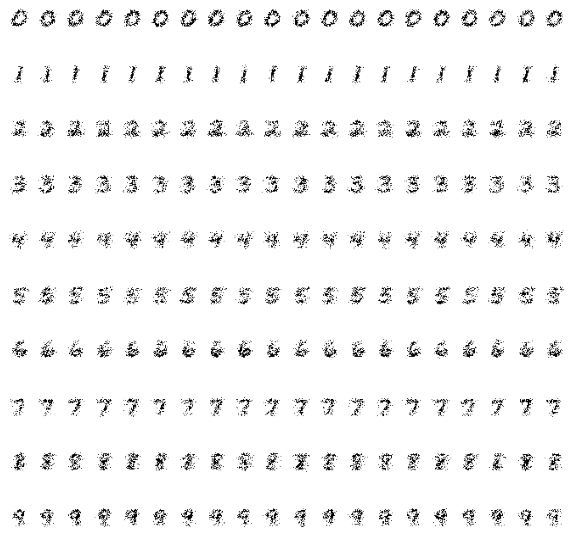

In [145]:
def P10(num_examples):

### STUDENT START ###
    #the model
    model = BernoulliNB(binarize = 0.5, alpha = 0.001)
    model.fit(mini_train_data, mini_train_labels)
    
    #get the conditional probabilities, split them up so they're easier to iterate through
    predicted_probabilities = np.exp(model.feature_log_prob_)
    prob_rows, prob_columns = predicted_probabilities.shape[0], predicted_probabilities.shape[1]
    
    #make a plot, iterate through conditional probabilities and make random probabilities you compare them to
    #create a list of binary values indicating comparison of conditional probabiliites and random probabilities
    spot_on_grid = 1
    plt.figure(figsize = (10,10))
    for rows in range(prob_rows):
        for columns in range(num_examples):
            binaries_list = []
            random_probs = np.random.rand(prob_columns)
            for x in (predicted_probabilities[rows]>random_probs):
                values = int(x)
                binaries_list.append(values)
            binaries_reshaped = np.array(binaries_list).reshape((28,28))
            plt.subplot(prob_rows, num_examples, spot_on_grid)
            plt.axis('off')
            plt.imshow(binaries_reshaped, cmap= 'Greys')         
            spot_on_grid += 1
                
                
                
### STUDENT END ###

P10(20)

ANSWER: The generated images are far less clear than the training digit images. I think this is because we are generating them with BernoulliNB.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [146]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    #make bernoulli model, assign predicted labels, assign predicted probabilities
    model = BernoulliNB(binarize=0.5, alpha = 0.001).fit(mini_train_data, mini_train_labels)
    predicted_labels = model.predict(dev_data)
    predicted_probabilities = model.predict_proba(dev_data)
    
    #iterate through buckets/track count, then iterate through predicted probabilities/track count
    for bucket_num, bucket in enumerate(buckets):
        for prob_num, prob in enumerate(predicted_probabilities):
            # when the bucket value is greater than the probability- increase total
            buckets_vs_probs = (bucket>=max(prob))
            if buckets_vs_probs:
                total[bucket_num] += 1
                #when the labels from the test set are the same as the predicted labels- increase correct
                correct_stuff = (dev_labels[prob_num] == predicted_labels[prob_num])
                if correct_stuff:
                    correct[bucket_num] += 1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  36    accuracy = 0.389
p(pred) is 0.9000000000000 to 0.9990000000000    total = 126    accuracy = 0.429
p(pred) is 0.9990000000000 to 0.9999900000000    total = 195    accuracy = 0.477
p(pred) is 0.9999900000000 to 0.9999999000000    total = 262    accuracy = 0.527
p(pred) is 0.9999999000000 to 0.9999999990000    total = 312    accuracy = 0.574
p(pred) is 0.9999999990000 to 0.9999999999900    total = 384    accuracy = 0.635
p(pred) is 0.9999999999900 to 0.9999999999999    total = 450    accuracy = 0.673
p(pred) is 0.9999999999999 to 1.0000000000000    total = 1000    accuracy = 0.828


ANSWER: The posterior probabilities are much higher than the accuracy values. For example, even when the posterior probability is very close to one (0.9999999999999 to 1.0000000000000) the accuracy is not incredibly high. Additionally, the accuracy is below 50% when the posterior probability is between 0.9990000000000 and 0.9999900000000. This classifier is not calibrated very well.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()